## Backtracking line search 回溯线性搜索
线搜索的目的是在搜索方向上找到是目标函数$f(x)$最小的点。然而，精确找到最小点比较耗时，由于搜索方向本来就是近似，所以用较小的代价找到最小点的近似就可以了。Backtracking line search（BLS）就是这样一种线性搜索算法

**BLS算法的思想是：在搜索方向上，先设置一个初始步长$\alpha _0$,如果步长太大，则缩减步长，直到合适为止**
1. 如何判断当前步长是否合适：

<center> $ f(x+\alpha p)<=f(x)+\alpha cm $ </center>
<center>$ m=p^T \nabla f(x)  $ </center>
其中，P是当前搜寻方向，$\alpha$是步长，c是控制参数，需要根据情况人工核定。

从上式可以看出，当前点的斜率越小，$ f(x+\alpha p)-f(x)$的要求越小，步长就越小。对于一般的凸问题，搜寻点越接近最优点，原函数的斜率就七月小，因此步长越小，这也是符合直觉的。

2. 如何缩减步长
搜索步长的缩减通过$\tau $参数来控制，主要通过人工核定，即 $\alpha _j=\tau \alpha_(j-1)

总结BLS的算法流程：

(1)设置初始步长 $\alpha _0$

(2)判断$ f(x+\alpha p)<=f(x)+\alpha cm $ 是否满足，如果满足，停止；否则(3)

(3)$\alpha _j=\tau \alpha_(j-1)$，重复2


8.2944 0.7056000000000012
0.6502809600000009 0.05531904000000035
0.05098202726400033 0.004337012736000018
0.003996990937497611 0.00034002179850240664
0.00031336408949982016 2.665770900258648e-05
2.456774461678329e-05 2.089964385803191e-06
6


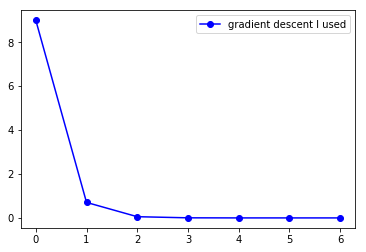

In [6]:
from matplotlib.pyplot import figure,plot, show, xlabel, ylabel, legend
def f(x):
        "The function we want to minimize"
        return (x-3)**2
def f_grad(x):
        "gradient of function f"
        return 2*(x-3)
x = 0
y = f(x)
err = 1.0
maxIter = 300
curve = [y]
it = 0
step = 0.1
# Backtracking line search 的python实现
x = 0
y = f(x)
err = 1.0
alpha = 0.25
beta = 0.8
curve2 = [y]
it = 0
 
while err > 1e-4 and it < maxIter:
    it += 1
    gradient = f_grad(x)
    step = 1.0
    while f(x - step * gradient) > y - alpha * step * gradient**2:
        step *= beta
    x = x - step * gradient
    new_y = f(x)
    err = y - new_y
    y = new_y
    print (err,y)
    curve2.append(y)
 
# print 'iterations: ', it
print(it)
plot(curve2, 'bo-')
legend(['gradient descent I used', 'backtracking line search'])
show()
 

## 自适应的learning rate
 ### AdaGrad算法

Adagrad优化算法被称为自适应学习率优化算法，之前我们讲的随机梯度下降对所有的参数都使用的固定的学习率进行参数更新，但是不同的参数梯度可能不一样，所以需要不同的学习率才能比较好的进行训练，但是这个事情又不能很好地被人为操作，所以 AdaGrad 便能够帮助我们做这件事。

<center>$ n_t=n_(t-1)+g_t^2$</center>
<center>$ \Delta \theta _t=-\frac{\eta}{\sqrt{n_t+\epsilon}}*g_t $</center>

其中$\eta$是学习率，$g_t$是梯度
**AdaGrad 的核心想法就是，如果一个参数的梯度一直都非常大，那么其对应的学习率就变小一点，防止震荡，而一个参数的梯度一直都非常小，那么这个参数的学习率就变大一点，使得其能够更快地更新** 

https://github.com/ivallesp/awesome-optimizers/blob/master/Report.ipynb

In [ ]:
class AdaGrad(Optimizer):
    def __init__(self, cost_f, lr=0.001, x=None, y=None):
        super().__init__(cost_f=cost_f, lr=lr, x=x, y=y)
        self.sumsq_dx = 0
        self.sumsq_dy = 0
        
    def step(self, lr = None):
        epsilon = 1e-8
        if not lr:
            lr = self.lr
        # derivative
        f = self.cost_f.eval(self.x, self.y)
        dx = self.cost_f.df_dx(self.x, self.y)
        dy = self.cost_f.df_dy(self.x, self.y)
        self.sumsq_dx += dx**2
        self.sumsq_dy += dy**2
        self.x = self.x - (lr/(np.sqrt(epsilon + self.sumsq_dx)))*dx
        self.y = self.y - (lr/(np.sqrt(epsilon + self.sumsq_dy)))*dy
        
        return [self.x, self.y]

### AdaDelta 算法

AdaDelta算法是对AdaGrad算法的改进。相比于AdaGard算法，AdaDelta算法有两大优势：(1) 解决了AdaGard算法学习率不断降低的问题，(2)动态确定学习率， 不需要提前设置学习率这一超参数。


In [ ]:
class AdaDelta(Optimizer):
    def __init__(self, cost_f, lr=0.001, decay_rate=0.9, x=None, y=None):
        super().__init__(cost_f=cost_f, lr=lr, x=x, y=y, decay_rate=decay_rate)
        self.decay_x = 0
        self.decay_y = 0
        self.decay_dx = 1
        self.decay_dy = 1
        
    def step(self, lr=None, decay_rate=None):
        epsilon = 1e-8
        if not lr:
            lr = self.lr
        if not decay_rate:
            decay_rate = self.decay_rate
        # derivative
        f = self.cost_f.eval(self.x, self.y)
        dx = self.cost_f.df_dx(self.x, self.y)
        dy = self.cost_f.df_dy(self.x, self.y)
        # Update decays
        self.decay_x = decay_rate * (self.decay_x) + (1-decay_rate)*dx**2
        self.decay_y = decay_rate * (self.decay_y) + (1-decay_rate)*dy**2
        
        update_x = dx*((np.sqrt(epsilon + self.decay_dx))/(np.sqrt(epsilon + self.decay_x)))
        update_y = dy*((np.sqrt(epsilon + self.decay_dy))/(np.sqrt(epsilon + self.decay_y)))
        
        self.x = self.x - (update_x)*lr
        self.y = self.y - (update_y)*lr
        
        # Update decays d
        self.decay_dx = decay_rate * (self.decay_dx) + (1-decay_rate)*update_x**2
        self.decay_dy = decay_rate * (self.decay_dy) + (1-decay_rate)*update_y**2
        
        return [self.x, self.y]

### RMSprop 算法
特点：

其实RMSprop依然依赖于全局学习率
RMSprop算是Adagrad的一种发展，和Adadelta的变体，效果趋于二者之间
适合处理非平稳目标 - 对于RNN效果很好

In [ ]:
class RMSProp(Optimizer):
    def __init__(self, cost_f, lr=0.001, decay_rate=0.9, x=None, y=None):
        super().__init__(cost_f=cost_f, lr=lr, x=x, y=y, decay_rate=decay_rate)
        self.ms_x = 0
        self.ms_y = 0
        
    def step(self, lr=None, decay_rate=None):
        epsilon = 1e-8
        if not lr:
            lr = self.lr
        if not decay_rate:
            decay_rate = self.decay_rate
        # derivative
        f = self.cost_f.eval(self.x, self.y)
        dx = self.cost_f.df_dx(self.x, self.y)
        dy = self.cost_f.df_dy(self.x, self.y)
        self.ms_x = self.decay_rate * (self.ms_x) + (1-self.decay_rate)*dx**2
        self.ms_y = self.decay_rate * (self.ms_y) + (1-self.decay_rate)*dy**2
        self.x = self.x - (lr/(epsilon + np.sqrt(self.ms_x)))*dx
        self.y = self.y - (lr/(epsilon + np.sqrt(self.ms_y)))*dy
        
        return [self.x, self.y]

### Adam算法
Adam(Adaptive Moment Estimation)本质上是带有动量项的RMSprop，它利用梯度的一阶矩估计和二阶矩估计动态调整每个参数的学习率。Adam的优点主要在于经过偏置校正后，每一次迭代学习率都有个确定范围，使得参数比较平稳。

特点：
结合了Adagrad善于处理稀疏梯度和RMSprop善于处理非平稳目标的优点
对内存需求较小
为不同的参数计算不同的自适应学习率
也适用于大多非凸优化 - 适用于大数据集和高维空间

In [ ]:
class AdaDelta(Optimizer):
    def __init__(self, cost_f, lr=0.001, decay_rate=0.9, x=None, y=None):
        super().__init__(cost_f=cost_f, lr=lr, x=x, y=y, decay_rate=decay_rate)
        self.decay_x = 0
        self.decay_y = 0
        self.decay_dx = 1
        self.decay_dy = 1
        
    def step(self, lr=None, decay_rate=None):
        epsilon = 1e-8
        if not lr:
            lr = self.lr
        if not decay_rate:
            decay_rate = self.decay_rate
        # derivative
        f = self.cost_f.eval(self.x, self.y)
        dx = self.cost_f.df_dx(self.x, self.y)
        dy = self.cost_f.df_dy(self.x, self.y)
        # Update decays
        self.decay_x = decay_rate * (self.decay_x) + (1-decay_rate)*dx**2
        self.decay_y = decay_rate * (self.decay_y) + (1-decay_rate)*dy**2
        
        update_x = dx*((np.sqrt(epsilon + self.decay_dx))/(np.sqrt(epsilon + self.decay_x)))
        update_y = dy*((np.sqrt(epsilon + self.decay_dy))/(np.sqrt(epsilon + self.decay_y)))
        
        self.x = self.x - (update_x)*lr
        self.y = self.y - (update_y)*lr
        
        # Update decays d
        self.decay_dx = decay_rate * (self.decay_dx) + (1-decay_rate)*update_x**2
        self.decay_dy = decay_rate * (self.decay_dy) + (1-decay_rate)*update_y**2
        
        return [self.x, self.y]

![梯度下降算法的效果比较](https://pic1.zhimg.com/5d5166a3d3712e7c03af74b1ccacbeac_r.jpg)

## Ridge 的作用

Ridge回归是一种专用于共线性数据分析的有偏估计回归方法。Ridge的作用是保持所有变量，例如使用所有变量来建立模型，同时赋予它们重要度，从而提高模型的性能。当数据集中变量数量较少时，岭是一个很好的选择，因此需要所有这些变量来解释得到的“洞察力”和预测目标结果。

由于Ridge保持了所有变量的完整性，并且lasso在分配变量的重要度方面做得更好，因此，结合Ridge和Lasso的最佳特性，组合出了“弹性网络”，作为开发算法。弹性网络是更理想的选择。

在进行机器学习时，有更多方法来进行特征选择，基本思想通常保持不变：显示特征的重要度，然后根据获得的“重要度”消除变量。这里的重要度是一个非常主观的术语，因为它不是一个度量，而是度量和图形的集合，可以用来检查最重要的特征。
